1. Install and import Dependencies

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
!cd yolov5 & pip install -r requirements.txt

2. Load Model

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\soura/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-10-18 Python-3.10.0 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

#3. Make Detections with images

In [ ]:
Image = 'C:/Users/soura/yolov5/data/images/TP.jpeg'

In [ ]:

results = model(Image)
results.print()

C:\Users\soura/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 903x1600 13 persons, 1 handbag, 1 cup, 1 cell phone
Speed: 43.1ms pre-process, 54.9ms inference, 89.7ms NMS per image at shape (1, 3, 384, 640)


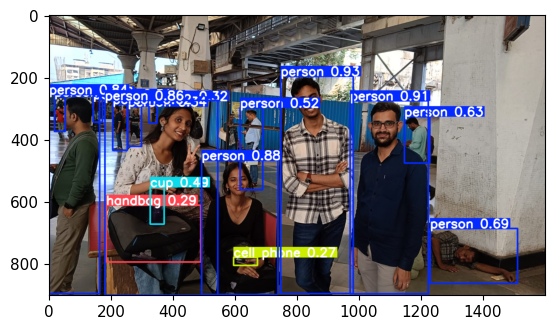

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

[array([[[ 48,  38,  39],
         [ 43,  33,  34],
         [ 31,  21,  22],
         ...,
         [181, 172, 163],
         [181, 172, 163],
         [181, 172, 163]],
 
        [[ 55,  45,  46],
         [ 48,  38,  39],
         [ 35,  25,  26],
         ...,
         [181, 172, 163],
         [181, 172, 163],
         [181, 172, 163]],
 
        [[ 59,  49,  50],
         [ 49,  39,  40],
         [ 34,  24,  25],
         ...,
         [182, 173, 164],
         [182, 173, 164],
         [182, 173, 164]],
 
        ...,
 
        [[  4,  42, 255],
         [  4,  42, 255],
         [  4,  42, 255],
         ...,
         [ 75,  65,  56],
         [ 77,  67,  58],
         [ 80,  70,  61]],
 
        [[ 72,  69, 110],
         [ 55,  62, 139],
         [ 54,  61, 138],
         ...,
         [ 82,  72,  63],
         [ 85,  74,  68],
         [ 88,  78,  69]],
 
        [[ 87,  74,  58],
         [ 87,  74,  58],
         [ 86,  73,  57],
         ...,
         [ 92,  81,  75],
  

4.Real time detections

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

C:\Users\soura/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\soura/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\soura/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\soura/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\soura/.cache\torch\hub\ultralytics_yolov5_master\models

KeyboardInterrupt: 

5.Train from scratch

In [ ]:
import cv2
import os
import time
import uuid

# Define labels and number of images per label
labels = ['awake', 'drowsy']
number_imgs = 5

# Path where images will be saved
IMAGES_PATH = r'D:/PYTHON PROJECT/object-detection/yolov5/data/images'

# Make sure the directory exists
os.makedirs(IMAGES_PATH, exist_ok=True)

# Start video capture
cap = cv2.VideoCapture(0)

# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(2)  # 2 seconds delay before starting to capture images

    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num + 1))

        # Capture frame from webcam
        ret, frame = cap.read()

        if ret:
            # Naming out image path
            imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')

            # Write image to file
            cv2.imwrite(imgname, frame)
            print(f'Saved: {imgname}')

            # Display the frame for preview
            cv2.imshow('Image Collection', frame)

            # 2-second delay between captures
            time.sleep(2)

            # Stop if 'q' is pressed
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

# Release the video capture and close the window
cap.release()
cv2.destroyAllWindows()


Saved: D:/PYTHON PROJECT/object-detection/yolov5/data/images\awake.41343ba7-8d1e-11ef-895c-a0d365677559.jpg
Saved: D:/PYTHON PROJECT/object-detection/yolov5/data/images\awake.42734b89-8d1e-11ef-97f9-a0d365677559.jpg
Saved: D:/PYTHON PROJECT/object-detection/yolov5/data/images\awake.43b2324f-8d1e-11ef-9f04-a0d365677559.jpg
Saved: D:/PYTHON PROJECT/object-detection/yolov5/data/images\awake.44e81d27-8d1e-11ef-a41a-a0d365677559.jpg
Saved: D:/PYTHON PROJECT/object-detection/yolov5/data/images\awake.461f3cce-8d1e-11ef-bb93-a0d365677559.jpg
Saved: D:/PYTHON PROJECT/object-detection/yolov5/data/images\drowsy.48896727-8d1e-11ef-8b90-a0d365677559.jpg
Saved: D:/PYTHON PROJECT/object-detection/yolov5/data/images\drowsy.49c1477f-8d1e-11ef-ad03-a0d365677559.jpg
Saved: D:/PYTHON PROJECT/object-detection/yolov5/data/images\drowsy.4af9bcc3-8d1e-11ef-a964-a0d365677559.jpg
Saved: D:/PYTHON PROJECT/object-detection/yolov5/data/images\drowsy.4c2fa669-8d1e-11ef-84b4-a0d365677559.jpg
Saved: D:/PYTHON PROJECT

In [ ]:
!git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [ ]:
%pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data "D:/PYTHON PROJECT/object-detection/yolov5/dataset.yaml" --weights yolov5s.pt --workers 2


train: weights=yolov5s.pt, cfg=, data=D:/PYTHON PROJECT/object-detection/yolov5/dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github:  YOLOv5 is out of date by 2 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
fatal: cannot change to 'D:\PYTHON': No such file or directory
YOLOv5  2024-10-17 Python-3.10.0 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

6.Load Custom Model

In [ ]:
import torch
import os
import matplotlib.pyplot as plt
import numpy as np

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

# Path to the image you want to test
img = r'D:/PYTHON PROJECT/object-detection/yolov5/data/images/awake.41343ba7-8d1e-11ef-895c-a0d365677559.jpg'

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\soura/.cache\torch\hub\master.zip
YOLOv5  2024-10-18 Python-3.10.0 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [ ]:
# Make predictions using the model
results = model(img)

# Print the results
results.print()

C:\Users\soura/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 480x640 1 drowsy
Speed: 9.7ms pre-process, 14.4ms inference, 135.3ms NMS per image at shape (1, 3, 480, 640)


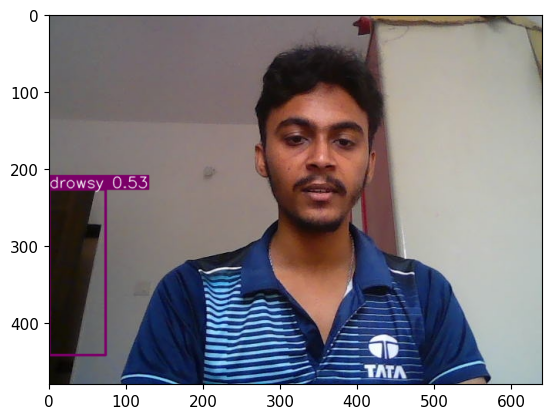

In [ ]:
# Display the image with predictions
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.axis('on')
plt.show()

In [ ]:
import torch
import cv2
import numpy as np

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

# Initialize the webcam
cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("Failed to grab frame")
        break

    # Make detections
    results = model(frame)

    # Render the results on the frame
    rendered_frame = np.squeeze(results.render())

    # Display the frame with the detections
    cv2.imshow('YOLO', rendered_frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\soura/.cache\torch\hub\master.zip
YOLOv5  2024-10-18 Python-3.10.0 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 
C:\Users\soura/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\soura/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
C:\Users\soura/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp

KeyboardInterrupt: 